# Глава 3 (Сазанович Владислав М3339)

In [64]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import hashlib
import time
import copy

from numpy.linalg import matrix_rank
from tqdm import tqdm

In [37]:
n = 25
k = 10
d = 15

In [38]:
# Вспомогательны фунции: факториал и сочетания
def fact(n):
    cur = 1
    for i in range(1, n + 1):
        cur *= i
    return cur

def comb(n, k):
    return fact(n) / (fact(k) * fact(n - k))

# Границы

In [39]:
def satisfyHemming(n, k, d):
    return 2**k <= 2**n / (np.sum([comb(n, i) for i in range(0, (d - 1) // 2 + 1)]))

def satisfyVHilbert(n, k, d):
    return 2**(n-k) > np.sum([comb(n - 1, i) for i in range(0, d - 1)])

def satisfyGraismer(n, k, d):
    return n >= np.sum([np.ceil(d / (2**i)) for i in range(0, k)])

# Функции для поиска $k$ или $d$ удовлетворяющих границе

In [40]:
# given n and d, find min k : (n, k, d) satisfy border
def findK(n, d, border, name=None, ret=True):
    for k in range(0, n):
        if not border(n, k, d):
            if not (name is None):
                print("{} n = {} d = {}: k = {}".format(name, n, d, k - 1))
            if ret:
                return k - 1
            else:
                return
    return 0

In [41]:
# given n and k, find min d : (n, k, d) satisfy border
def findD(n, k, border, name=None, ret=True):
    for d in range(1, n):
        if not border(n, k, d):
            if not (name is None):
                print("{} n = {} k = {}: d = {}".format(name, n, k, d - 1))
            if ret:
                return d - 1
            else:
                return
    return 0

# Задание 1

### Коды Хемминга
$n = 2^r - 1, k = 2^r - r - 1, d = 3$

Граница Хемминга: 

$2^k <= \frac{2^n}{\sum_{i=0}^{t}C_n^i}$

${\sum_{i=0}^{t}C_n^i} <= 2^{r}$

$C_n^0 + C_n^1 <= 2^{r}$

$2^r = 2^r$

Проверим:

In [42]:
def satisfyHemmingWithEq(n, k, d):
    t = (d - 1) // 2
    return 2**k == 2**n / (np.sum([comb(n, i) for i in range(0, t + 1)]))

for r in range(1, 10):
    print(satisfyHemmingWithEq(2**r - 1, 2**r - r - 1, 3))

True
True
True
True
True
True
True
True
True


### Код Голея
$n = 23, k = 12, d = 7$

Достаточно просто проверить:

In [43]:
satisfyHemmingWithEq(23, 12, 7)

True

# Задание 2

### Коды к дуальным кодам Хемминга
$n = 2^r - 1, k = r, d = 2^{r - 1}$

$\delta = \frac{d}{n} = \frac{2^{r-1}}{2^r - 1} \rightarrow_{n \rightarrow \infty} 1/2$

#### Граница Хемминга

$R \le 1 - h(\frac{\delta}{2}) ,\, h(x) = x\ log_2(x) - (1-x)\ log_2(1-x)$

$R \le 1 - h(\frac{1}{4}) = \frac{1}{4} * (-2) - \frac{3}{4} * (log_2(3) - 2) = 1 + \frac{log_2(3)}{4}$

$R \le 1.4$

$\frac{r}{2^r - 1} \le 1.4$

При больших $r$ код не лежит на границе Хемминга

#### Граница Варшамова-Гилберта

$R_{VG} = 1 - h(\delta) = 1 - h(\frac{1}{2}) = 1 - (\frac{1}{2} + \frac{1}{2}) = 0$

При больших r:

$R = \frac{r}{2^r - 1} \rightarrow 0$ => При больших $r$ код лежит на границе Варшамова-Гилберта



#### Граница Плоткина
$k \le n - 2d$

$d \le \frac{n - k}{2}$

$2^{r - 1} \le \frac{2^r-r-1}{2}$

При больших  $r$ коды дуальные к кодам Хемминга будут лежать на границе Плоткина.

# Заданиe 3

In [44]:
findK(n, d, satisfyHemming, "Граница Хемминга", ret=False)

Граница Хемминга n = 25 d = 15: k = 5


In [45]:
findK(n, d, satisfyVHilbert, "Граница Варшамова-Гилберта", ret=False)

Граница Варшамова-Гилберта n = 25 d = 15: k = 1


In [46]:
findK(n, d, satisfyGraismer, "Граница Грайсмера", ret=False)

Граница Грайсмера n = 25 d = 15: k = 2


Для $n = 25, d = 15$ возможно построить коды с $1 < k <= 2$.

# Задание 4

In [47]:
findD(n, k, satisfyHemming, "Граница Хемминга", ret=False)

Граница Хемминга n = 25 k = 10: d = 10


In [48]:
findD(n, k, satisfyVHilbert, "Граница Варшамова-Гилберта", ret=False)

Граница Варшамова-Гилберта n = 25 k = 10: d = 6


In [49]:
findD(n, k, satisfyGraismer, "Граница Грайсмера", ret=False)

Граница Грайсмера n = 25 k = 10: d = 9


Для $n = 25, k = 10$ возможно построить коды с $6 < d <= 9$.

# Задание 5

Данные из таблицы для $\frac{k}{n} = \frac{1}{2}$

In [50]:
code_n = np.array([8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])
code_d = np.array([4, 4 , 4 , 4 , 5 , 6 , 6 , 7 , 8 , 7 , 8 , 8 , 8 , 8 , 8 , 9 , 10])

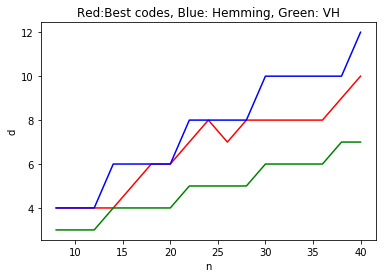

In [51]:
def getHemmingD(n):
    res_d = []
    for i in range(0, len(n)):
        res_d.append(findD(n[i], n[i] // 2, satisfyHemming))
    return np.array(res_d)

def getVHilbertD(n):
    res_d = []
    for i in range(0, len(n)):
        res_d.append(findD(n[i], n[i] // 2, satisfyVHilbert))
    return np.array(res_d)

plt.plot(code_n, code_d, 'r')
plt.plot(code_n, getHemmingD(code_n), 'b')
plt.plot(code_n, getVHilbertD(code_n), 'g')

plt.xlabel('n')
plt.ylabel('d')
plt.title('Red:Best codes, Blue: Hemming, Green: VH')

plt.show()

# Задание 7

[ 3  4  5  5  6  7  8  9 10 11 12 12 12 13 14 14 15]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


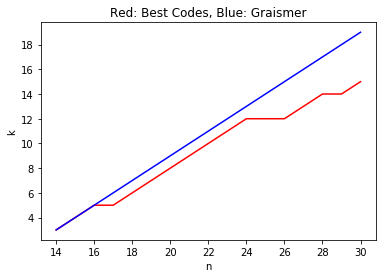

In [52]:
best_n = np.array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
best_k = np.array([3 , 4 , 5 , 5 , 6 , 7 , 8 , 9 , 10, 11, 12, 12, 12, 13, 14, 14, 15])

def getGraismerK(n):
    res_k = []
    for i in range(0, len(n)):
        res_k.append(findK(n[i], 8, satisfyGraismer))
    return np.array(res_k)

print(best_k)
print(getGraismerK(best_n))

plt.plot(best_n, best_k, 'r')
plt.plot(best_n, getGraismerK(best_n), 'b')

plt.xlabel('n')
plt.ylabel('k')
plt.title('Red: Best Codes, Blue: Graismer')

plt.show()

# Задание 8

Напишем простой алгоритм по построению таких кодом. Будем постепенно пытаться добавлить новый случайный вектор и проверять ЛНЗ ли он со всеми возможными комбинациями из $d - 1$ вектора.

In [53]:
# Helpers for lists
def first_or_default(arr, default):
    if len(arr) == 0:
        return default
    return arr[0]

def first_not_zero(row):
    return first_or_default(np.where(row > 0)[0], len(row))

def last_or_default(arr, default):
    if len(arr) == 0:
        return default
    return arr[-1]

def last_not_zero(row):
    return last_or_default(np.where(row > 0)[0], len(row))

In [54]:
# Hashing of x
def get_hash(x): # x is np array
    return hashlib.sha1(x).hexdigest()

Напишем функцию которая будет смотреть ЛНЗ ли набор векторов. (Преобразуем Гауссом -> Считаем ранг)

In [55]:
# Sort by first non zero
def sort(H):
    return sorted(H, key=lambda row: first_not_zero(row))

In [56]:
# Applies Gaussian transformation and calculates rank for binary matrix
def rank(H):
    for i in range(len(H)):
        H = sort(H)
        col_i = first_not_zero(H[i])
        if col_i == -1:
            break
        
        for j in range(i + 1, len(H)):
            col_j = first_not_zero(H[j])
            if col_j == -1:
                break
            if col_i == col_j:
                H[j] = (H[j] - H[i] + 2) % 2
                
    for i in range(len(H) - 1, 0, -1):
        col_i = first_not_zero(H[i])
        if col_i == -1:
            continue
            
        for j in range(i + 1, len(H)):
            col_j = first_not_zero(H[j])
            if col_j == -1:
                continue
            if col_i == col_j:
                H[j] = (H[j] - H[i] + 2) % 2
            
    rank = 0
    for i in range(len(H)):
        if first_or_default(np.where(H[i] > 0)[0], None) is not None:
            rank += 1
    return rank

In [57]:
def is_lineary_independent(H):
    return rank(np.array(H)) == len(H)

In [58]:
# Check
HH = np.array([
    [0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0]
])

print(is_lineary_independent([*HH, [0, 1, 1, 0, 0, 0]]))
print(is_lineary_independent([*HH, [1, 1, 1, 0, 0, 0]]))

True
False


Рекурсивно генерируем все возможные упорядоченные комбинации из $d - 1$.

In [59]:
def can_add_to_H(H, h_cand, d):
    for i in range(len(H)):
        if not recursive_check(H, h_cand, d, [], i):
            return False
    return True

def recursive_check(H, h_cand, lim, CH, c_id):
    if len(CH) >= lim - 1:
        return True
    
    CH.append(H[c_id])
    
    nld = is_lineary_independent([*CH, h_cand])
    
    if not nld: # already not linear independent
        return False
    
    for i in range(c_id + 1, len(H)):
        nld = recursive_check(H, h_cand, lim, CH, i)
        if not nld:
            return False
        
    CH.pop()
    return True

In [60]:
# Check
H1 = np.array([
    [0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1, 0]
])

print(can_add_to_H(H1, [1, 1, 1, 0, 0, 0], 2))
print(can_add_to_H(H1, [0, 1, 1, 0, 0, 0], 2))


print(can_add_to_H(H1, [1, 1, 1, 0, 0, 0], 3))
print(can_add_to_H(H1, [0, 1, 1, 0, 0, 0], 3))

True
True
False
True


In [61]:
# fast generator of first d vectors
def generate_first_d(n, k, d):
    r = n - k
    H = []
    lc_counting  = []
    lc_unique = set()
    
    zero_v = np.zeros(r).astype(int)
    lc_counting.append(zero_v)
    lc_unique.add(get_hash(zero_v))
    
    for i in range(d):
        it = 0
        while (True):
            it += 1
            if it > 10:
                break
            
            cur = np.random.randint(0, 2, size=r, dtype=int)
            cur_h = get_hash(cur)
            if cur_h in lc_unique:
                continue
                
            H.append(cur)
            lc_unique.add(cur_h)
            lc_counting.append(cur)
            
            for v in lc_counting:
                temp = (cur + v) % 2
                temp_h = get_hash(temp)
                
                if temp_h not in lc_unique:
                    lc_unique.add(temp_h)
                    lc_counting.append(temp)
            break
    return H

Сам алгоритм: 
    - Генерируем рандомный вектор
    - Рекурисивно генерируем комбинации и проверяем ЛНЗ

In [62]:
def get_linear_code_vg(n, k, d):
    r = n - k
    
    H = generate_first_d(n, k, d)
            
    it = 10e3
    while len(H) < n:
        it -= 1
        if it == 0:
            return None
        c = np.random.randint(0, 2, size=r, dtype=int)
        
        if can_add_to_H(H, c, d / 4):
            if can_add_to_H(H, c, d / 2):
                if can_add_to_H(H, c, d):
                    H.append(c)
                else:
                    continue
            else:
                continue
        else:
            continue
            
    return np.asarray(H).reshape(r, n)

In [63]:
get_linear_code_vg(20, 10, 4)

array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]])

In [29]:
def test_algo(R):
    algo_time = []
    ns = np.arange(15, 25)
    ks = np.floor(ns * R).astype(int)

    for (n, k) in tqdm(zip(ns, ks)):
        d = findD(n, k, satisfyVHilbert, name=None, ret=True)
        start = time.time()
        code = get_linear_code_vg(n, k, d)
        end = time.time()
        algo_time.append(end - start)
    
    plt.plot(ns, algo_time)
    plt.ylabel('time (seconds)')
    plt.xlabel('n')
    plt.title('Working time of the algorithm with R={}'.format(R))
    plt.show()


0it [00:00, ?it/s]
10it [00:57,  8.27s/it]


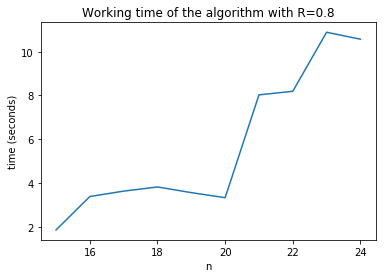

In [31]:
test_algo(0.8)

Алгоритм работает для кодов небольшой длины $(10 - 30)$ за несколько секунд.

# Задание 9

Вдоль диагоналей таблиц числа всегда убывают. Это можно обьяснить тем что скорость кода растет. Например: 
    
$k=5, n=9,\, R = 0.55$

$k=6, n=10,\, R = 0.6$

$k=7, n=11,\, R = 0.63$

Можно заметить что во второй таблице, числа на диагоналях почти всегда одинаковы, т.к. скорости кодов растут медленней.

In [33]:
def draw_R(n_start, k_start, steps):
    n = np.arange(n_start, n_start + steps)
    k = np.arange(k_start, k_start + steps)
    plt.plot(n, k / n)
    plt.xlabel('n')
    plt.ylabel('R')
    plt.title('Зависимость скорости кода от n на диагоналях')
    plt.show()

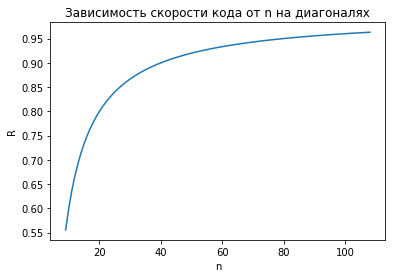

In [35]:
draw_R(9, 5, 100)